## DAQ and Data cleaning CustomerDemographic

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
cust_demo = pd.read_excel('Raw_data.xlsx', sheet_name='CustomerDemographic')
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

* So from the info we can see that `last_name` and `default` can be dropped from the dataset.

### 1. Dropping not relevant variables

In [5]:
cust_demo.drop(['last_name','default'],axis=1,inplace=True)
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   job_title                            3494 non-null   object        
 6   job_industry_category                3344 non-null   object        
 7   wealth_segment                       4000 non-null   object        
 8   deceased_indicator                   4000 non-null   object        
 9   owns_car                             4000 non-null   object        
 10  tenure      

### 2. Checking  and handling missing values

In [6]:
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [7]:
# custom function to impute missing values

def impute_nan(df, variable):
    """taking sample from non null values"""
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=42)
    """taking index of missing values"""
    random_sample.index = df[df[variable].isnull()].index
    """imputing the missing values using random sample"""
    df.loc[df[variable].isnull(),variable] = random_sample

In [16]:
for i in ['DOB','job_title','job_industry_category','tenure']:
    impute_nan(cust_demo,i)
    
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

* The missing values has been imputed using **Random Sample Imputation**

### 3. Checking for outliers

<AxesSubplot:xlabel='tenure'>

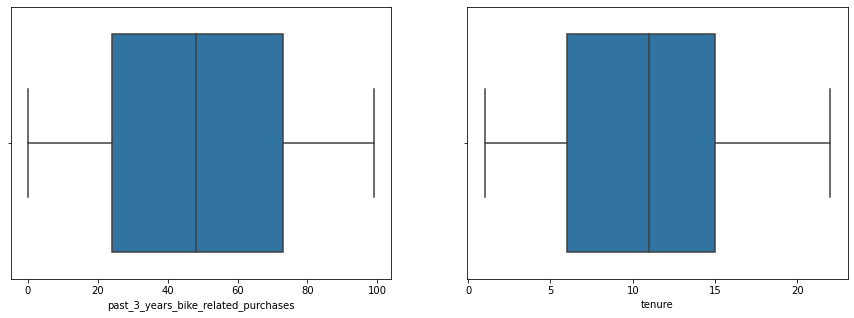

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(cust_demo['past_3_years_bike_related_purchases'])

plt.subplot(1,2,2)
sns.boxplot(cust_demo['tenure'])

* There are **No** outliers in this dataset.